In [20]:
import pandas as pd
import matplotlib.pyplot as plt
 

In [2]:
drc = pd.read_csv("drc2010_19.csv")

In [95]:
drcsub = drc[['event_type', 'sub_event_type', 'year']].copy()

In [54]:
#drc.tail()

In [4]:
drc.columns


Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')

In [96]:
drc.groupby('event_type').size()

event_type
Battles                       3745
Explosions/Remote violence      84
Protests                      1181
Riots                          754
Strategic developments        1197
Violence against civilians    3698
dtype: int64

**event_type:** battles, explosions/remote violence, protests, riots, strategic dev., violence against civilians

In [8]:
drc.groupby(['event_type', 'sub_event_type']).size()

event_type                  sub_event_type                     
Battles                     Armed clash                            3244
                            Government regains territory            357
                            Non-state actor overtakes territory     144
Explosions/Remote violence  Air/drone strike                         14
                            Grenade                                  23
                            Remote explosive/landmine/IED            17
                            Shelling/artillery/missile attack        30
Protests                    Excessive force against protesters       87
                            Peaceful protest                        846
                            Protest with intervention               248
Riots                       Mob violence                            228
                            Violent demonstration                   526
Strategic developments      Agreement                               152


In [68]:
drcsub.head()

,event_type,sub_event_type,year
0,Protests,Peaceful protest,2019
1,Riots,Violent demonstration,2019
2,Battles,Armed clash,2019
3,Strategic developments,Looting/property destruction,2019
4,Protests,Peaceful protest,2019


In [33]:
drcsub.year.dtype

dtype('int64')

In [97]:
event_dict = {
    2010:0, #pre-ebola
    2011:0,
    2012:0,
    2013:0,
    2014:1, #during
    2015:1,
    2016:1,
    2017:1,  #post-ebola
    2018:1,
    2019:1
}

drcsub['year_code'] = [event_dict[x] for x in drcsub['year']]

drcsub.head()

,event_type,sub_event_type,year,year_code
0,Protests,Peaceful protest,2019,1
1,Riots,Violent demonstration,2019,1
2,Battles,Armed clash,2019,1
3,Strategic developments,Looting/property destruction,2019,1
4,Protests,Peaceful protest,2019,1


In [98]:
drcsub['year_code'] = ["before" if x is 0 else "after" for x in drcsub['year_code']]

In [99]:
ds = pd.DataFrame(drcsub.groupby(['event_type', 'year_code']).size().reset_index())

In [100]:
ds

,event_type,year_code,0
0,Battles,after,2668
1,Battles,before,1077
2,Explosions/Remote violence,after,46
3,Explosions/Remote violence,before,38
4,Protests,after,1041
5,Protests,before,140
6,Riots,after,614
7,Riots,before,140
8,Strategic developments,after,805
9,Strategic developments,before,392


In [101]:
ds.rename(columns={0:'count'}, inplace=True)

<Figure size 4500x4500 with 0 Axes>

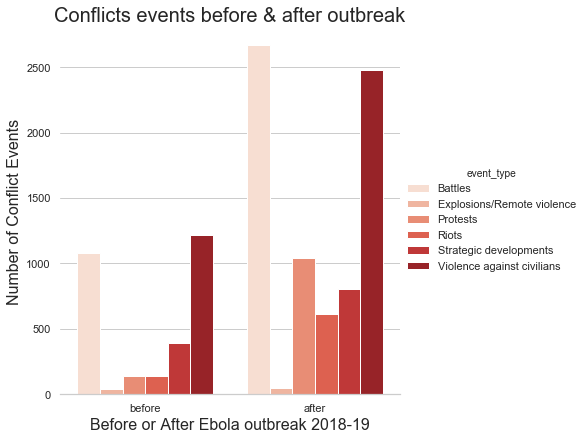

In [103]:
sns.set(style='whitegrid')

plt.figure(figsize=(15,15), dpi=300)


g = sns.catplot(x="year_code", y="count", hue="event_type", data=ds,
                height=6, kind="bar", palette="Reds", order=['before', 'after'])


g.despine(left=True)
plt.xlabel('Before or After Ebola outbreak 2018-19', fontsize=16)
plt.ylabel('Number of Conflict Events', fontsize=16)
plt.title('Conflicts events before & after outbreak', fontdict = {'fontsize' : 20});

plt.savefig("conflict.png", dpi=300, bbox_inches='tight')

In [59]:
#plt.figure(figsize=(12, 8))
ds = ds.pivot(index='year_code', columns='event_type', values='count')
ds.reset_index(inplace=True)

In [42]:
#ds.reset_index(inplace=True)

In [60]:
ds.columns

Index(['year_code', 'Battles', 'Explosions/Remote violence', 'Protests',
       'Riots', 'Strategic developments', 'Violence against civilians'],
      dtype='object', name='event_type')

In [61]:
ds

event_type,year_code,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians
0,0,1077,38,140,140,392,1219
1,1,994,27,408,260,303,867
2,2,1674,19,633,354,502,1612


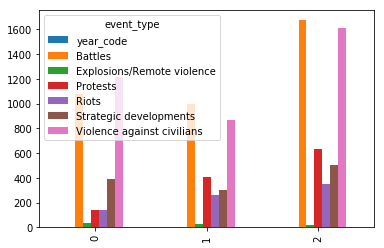

In [62]:
#ds.plot(kind='bar')



In [65]:
ds.columns

Index(['year_code', 'Battles', 'Explosions/Remote violence', 'Protests',
       'Riots', 'Strategic developments', 'Violence against civilians'],
      dtype='object', name='event_type')

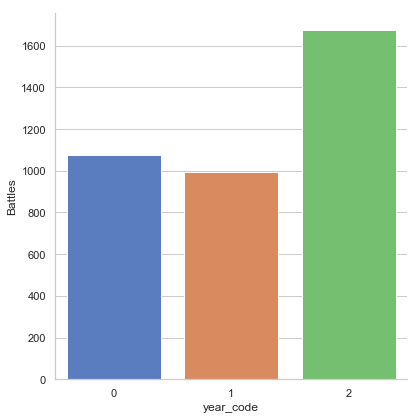

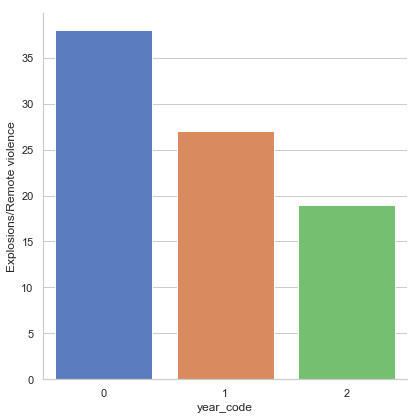

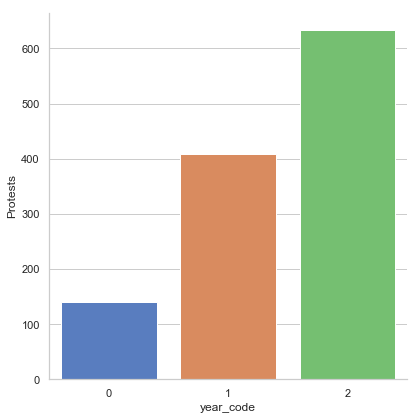

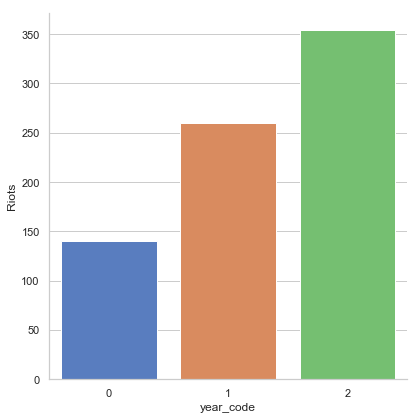

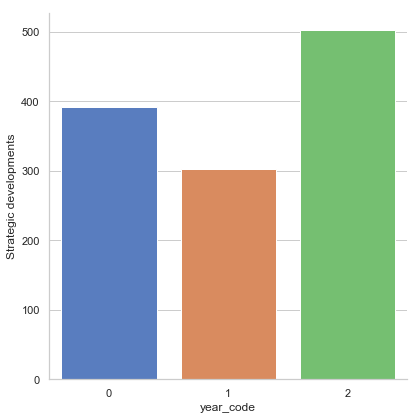

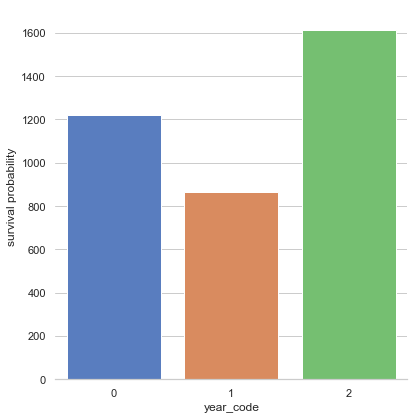

In [66]:
import seaborn as sns
sns.set(style="whitegrid")



# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="year_code", y="Battles", data=ds,
                height=6, kind="bar", palette="muted")
g = sns.catplot(x="year_code", y='Explosions/Remote violence', data=ds,
                height=6, kind="bar", palette="muted")
g = sns.catplot(x="year_code", y='Protests', data=ds,
                height=6, kind="bar", palette="muted")
g = sns.catplot(x="year_code", y='Riots', data=ds,
                height=6, kind="bar", palette="muted")
g = sns.catplot(x="year_code", y='Strategic developments', data=ds,
                height=6, kind="bar", palette="muted")
g = sns.catplot(x="year_code", y='Violence against civilians', data=ds,
                height=6, kind="bar", palette="muted")


g.despine(left=True)
g.set_ylabels("survival probability")